#Section 4

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.layers import Dropout

from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import KFold

In [ ]:
def load_data():
    
    return mnist.load_data()

In [ ]:
def prepare_data(train_images, train_labels, test_images, test_labels):

    x_train = train_images.reshape((60000, 784))
    x_train = x_train.astype('float32')/255

    x_test = test_images.reshape((10000, 784))
    x_test = x_test.astype('float32')/255

    #one hot encoding
    y_train =  to_categorical(train_labels) 
    y_test = to_categorical(test_labels)

    return (x_train, y_train, x_test, y_test )

In [ ]:
def model(x_train, y_train, x_test, y_test ):
    
    kfold = KFold(n_splits=10, shuffle=True)
    fold_no = 0
    history = ''
    
    # Define per-fold score containers
    acc_per_fold = []
    loss_per_fold = []
    for train_index, test_index in kfold.split(x_train):
        print(len(x_train[train_index]))
        model = Sequential()

        model.add(Dense(128, activation='relu', input_shape=(784,)))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation = 'softmax'))

        model.summary()

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(x_train[train_index], y_train[train_index],
                batch_size=2048, epochs=25, verbose=1,
                validation_data=(x_train[test_index], y_train[test_index]))

        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        # Generate generalization metrics
        scores = model.evaluate(x_train[test_index], y_train[test_index], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

        fold_no += 1
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
        print('------------------------------------------------------------------------')
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')

    score = model.evaluate(x_test, y_test)
    print('Test loss :', score[0])
    print('Test accuracy:', score[1] * 100)

    return history

In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def main():
    (train_images, train_labels), (test_images, test_labels) = load_data()
   
    x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)

    history = model(x_train, y_train, x_test, y_test)
    
    plot(history)

54000
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
27/27 [==============================] - 1s 33ms/step - loss: 1.3622 - accuracy: 0.6115 - val_loss: 0.5242 - val_accuracy: 0.8600
Epoch 2/25
27/27 [==============================] - 1s 28ms/step - loss: 0.4741 - accuracy: 0.8589

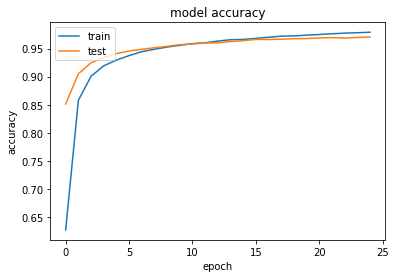

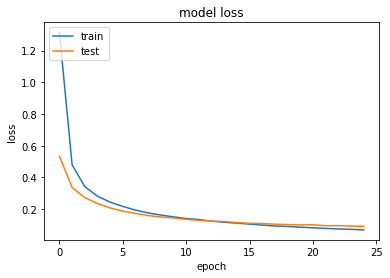

In [ ]:
main()